# Measuring stress likelihood by syllable in sonnets

In [1]:
# !pip install -r ../requirements.txt
import sys
sys.path.append('../')
from generative_formalism import *

In [2]:
# Docs
documentation(get_sonnet_rhythm_data)

# Run
df_rhythm = get_sonnet_rhythm_data(
    sample_by='sonnet_period',
    as_in_paper=True,
    as_replicated=False,
    force=False,
    verbose=True,
    collapse_C17_19=False,
)

describe_qual(df_rhythm.group, name='groups by line count')

# Display
df_rhythm

##### `get_sonnet_rhythm_data`

```md
Get combined rhythm analysis data for sonnets from multiple sources.

    Collects and combines rhythm measurements for sonnets from three main sources:
    1. Chadwyck corpus sonnets (historical periods C17-19 and C20)
    2. Shakespeare's 154 sonnets
    3. GenAI-generated sonnets

    The function retrieves rhythm measurements for each source, adds period
    labels, and combines them into a single DataFrame for comparative analysis.
    Results are filtered to sonnets with 10-12 syllables per line.

    Returns
    -------
    pd.DataFrame
        Combined rhythm data with columns including:
        - Rhythm measurements (from get_rhythm_for_* functions)
        - group : str, period label ("C17-19", "C20", "Shakespeare", "GenAI")
        - source : str, data source ("chadwyck", "shakespeare", "genai")
        - Additional metadata from original datasets
        Filtered to sonnets with 10-12 syllables per line.

    Calls
    -----
    - get_chadwyck_corpus_sampled_by(sample_by)
    - get_rhythm_for_sample(df_smpl)
    - get_rhythm_for_shakespeare_sonnets()
    - get_genai_rhyme_promptings_as_in_paper()
    - get_rhythm_for_sample(df_genai_sonnets, gen=False)
    
```
----


* Loading sonnet rhythm data from {PATH_REPO}/data/data_as_in_paper/sonnet_rhythm_data_by_sonnet_period.csv.gz
* Breakdown for groups by line count
GenAI          5376
C19            4069
C18            4029
C17            2665
Shakespeare    1980
C20            1831



,stanza_num,line_num,line_txt,linepart_num,parse_rank,parse_txt,is_iambic_pentameter,is_unambigously_iambic_pentameter,syll01_stress,syll02_stress,...,year,num_lines,volume,line,rhyme,genre,period,txt,group,source
id,,,,,,,,,,,,,,,,,,,,,
english/smithcha/Z300489005,1,1,"Mute is thy wild harp, now, O Bard sublime!",1,1,MUTE is.thy WILD harp NOW o BARD su BLIME,0,0,1,0,...,1779.0,14.0,Elegiac sonnets (1797–1800),"&indent;Who, amid Scotia's mountain solitude,",y,Sonnet,1700-1750,"Mute is thy wild harp, now, O Bard sublime!\n ...",C18,chadwyck
english/smithcha/Z300489005,1,2,"Who, amid Scotia's mountain solitude,",4,1,WHO a MID.SCO tia's MOUN tain SO li TUDE,0,0,1,0,...,1779.0,14.0,Elegiac sonnets (1797–1800),"&indent;Who, amid Scotia's mountain solitude,",y,Sonnet,1700-1750,"Mute is thy wild harp, now, O Bard sublime!\n ...",C18,chadwyck
english/smithcha/Z300489005,1,3,"Great Nature taught to ""built the lofty rhyme,""",6,1,great NA ture TAUGHT to BUILT the LOF ty RHYME,1,0,1,1,...,1779.0,14.0,Elegiac sonnets (1797–1800),"&indent;Who, amid Scotia's mountain solitude,",y,Sonnet,1700-1750,"Mute is thy wild harp, now, O Bard sublime!\n ...",C18,chadwyck
english/smithcha/Z300489005,1,4,"And even beneath the daily pressure, rude,",9,1,and E ven.be NEATH the DAI ly PRES sure RUDE,0,0,0,1,...,1779.0,14.0,Elegiac sonnets (1797–1800),"&indent;Who, amid Scotia's mountain solitude,",y,Sonnet,1700-1750,"Mute is thy wild harp, now, O Bard sublime!\n ...",C18,chadwyck
english/smithcha/Z300489005,1,5,"Of labouring Poverty, thy generous blood,",11,1,of LA bou.ring PO ver TY thy GE ne.rous BLOOD,0,0,0,1,...,1779.0,14.0,Elegiac sonnets (1797–1800),"&indent;Who, amid Scotia's mountain solitude,",y,Sonnet,1700-1750,"Mute is thy wild harp, now, O Bard sublime!\n ...",C18,chadwyck
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98719b6a,3,10,"For in thine heart, a virtue doth take place,",18,1,for IN thine HEART a VIR tue DOTH take PLACE,1,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GenAI,genai
98719b6a,3,11,"A kindness that doth shine with gentle might,",20,1,a KIN dness THAT doth SHINE with GEN tle MIGHT,1,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GenAI,genai
98719b6a,3,12,"And in thine eyes, a love that doth ignite.",21,1,and IN thine EYES a LOVE that DOTH i GNITE,1,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GenAI,genai


##### `plot_perfect_pentameter`

```md
Create a horizontal bar plot showing iambic pentameter adherence by group.

    Generates a horizontal bar plot with error bars showing the percentage of
    sonnet lines that adhere to strict iambic pentameter patterns across different
    sonnet sources. This provides a quantitative measure of metrical regularity.

    Parameters
    ----------
    df_rhythm : pd.DataFrame
        Rhythm data from get_sonnet_rhythm_data() with iambic pentameter metrics
    metric : str, default 'is_unambigously_iambic_pentameter'
        Column name for the iambic pentameter metric to plot

    Returns
    -------
    plotnine.ggplot
        Horizontal bar plot showing percentage of lines meeting iambic pentameter criteria
        by sonnet source, ordered from highest to lowest adherence
    
```
----


* Loading perfect pentameter plot from {PATH_REPO}/data/data_as_in_paper/figures/fig.is_unambigously_iambic_pentameter.sonnet_period.png


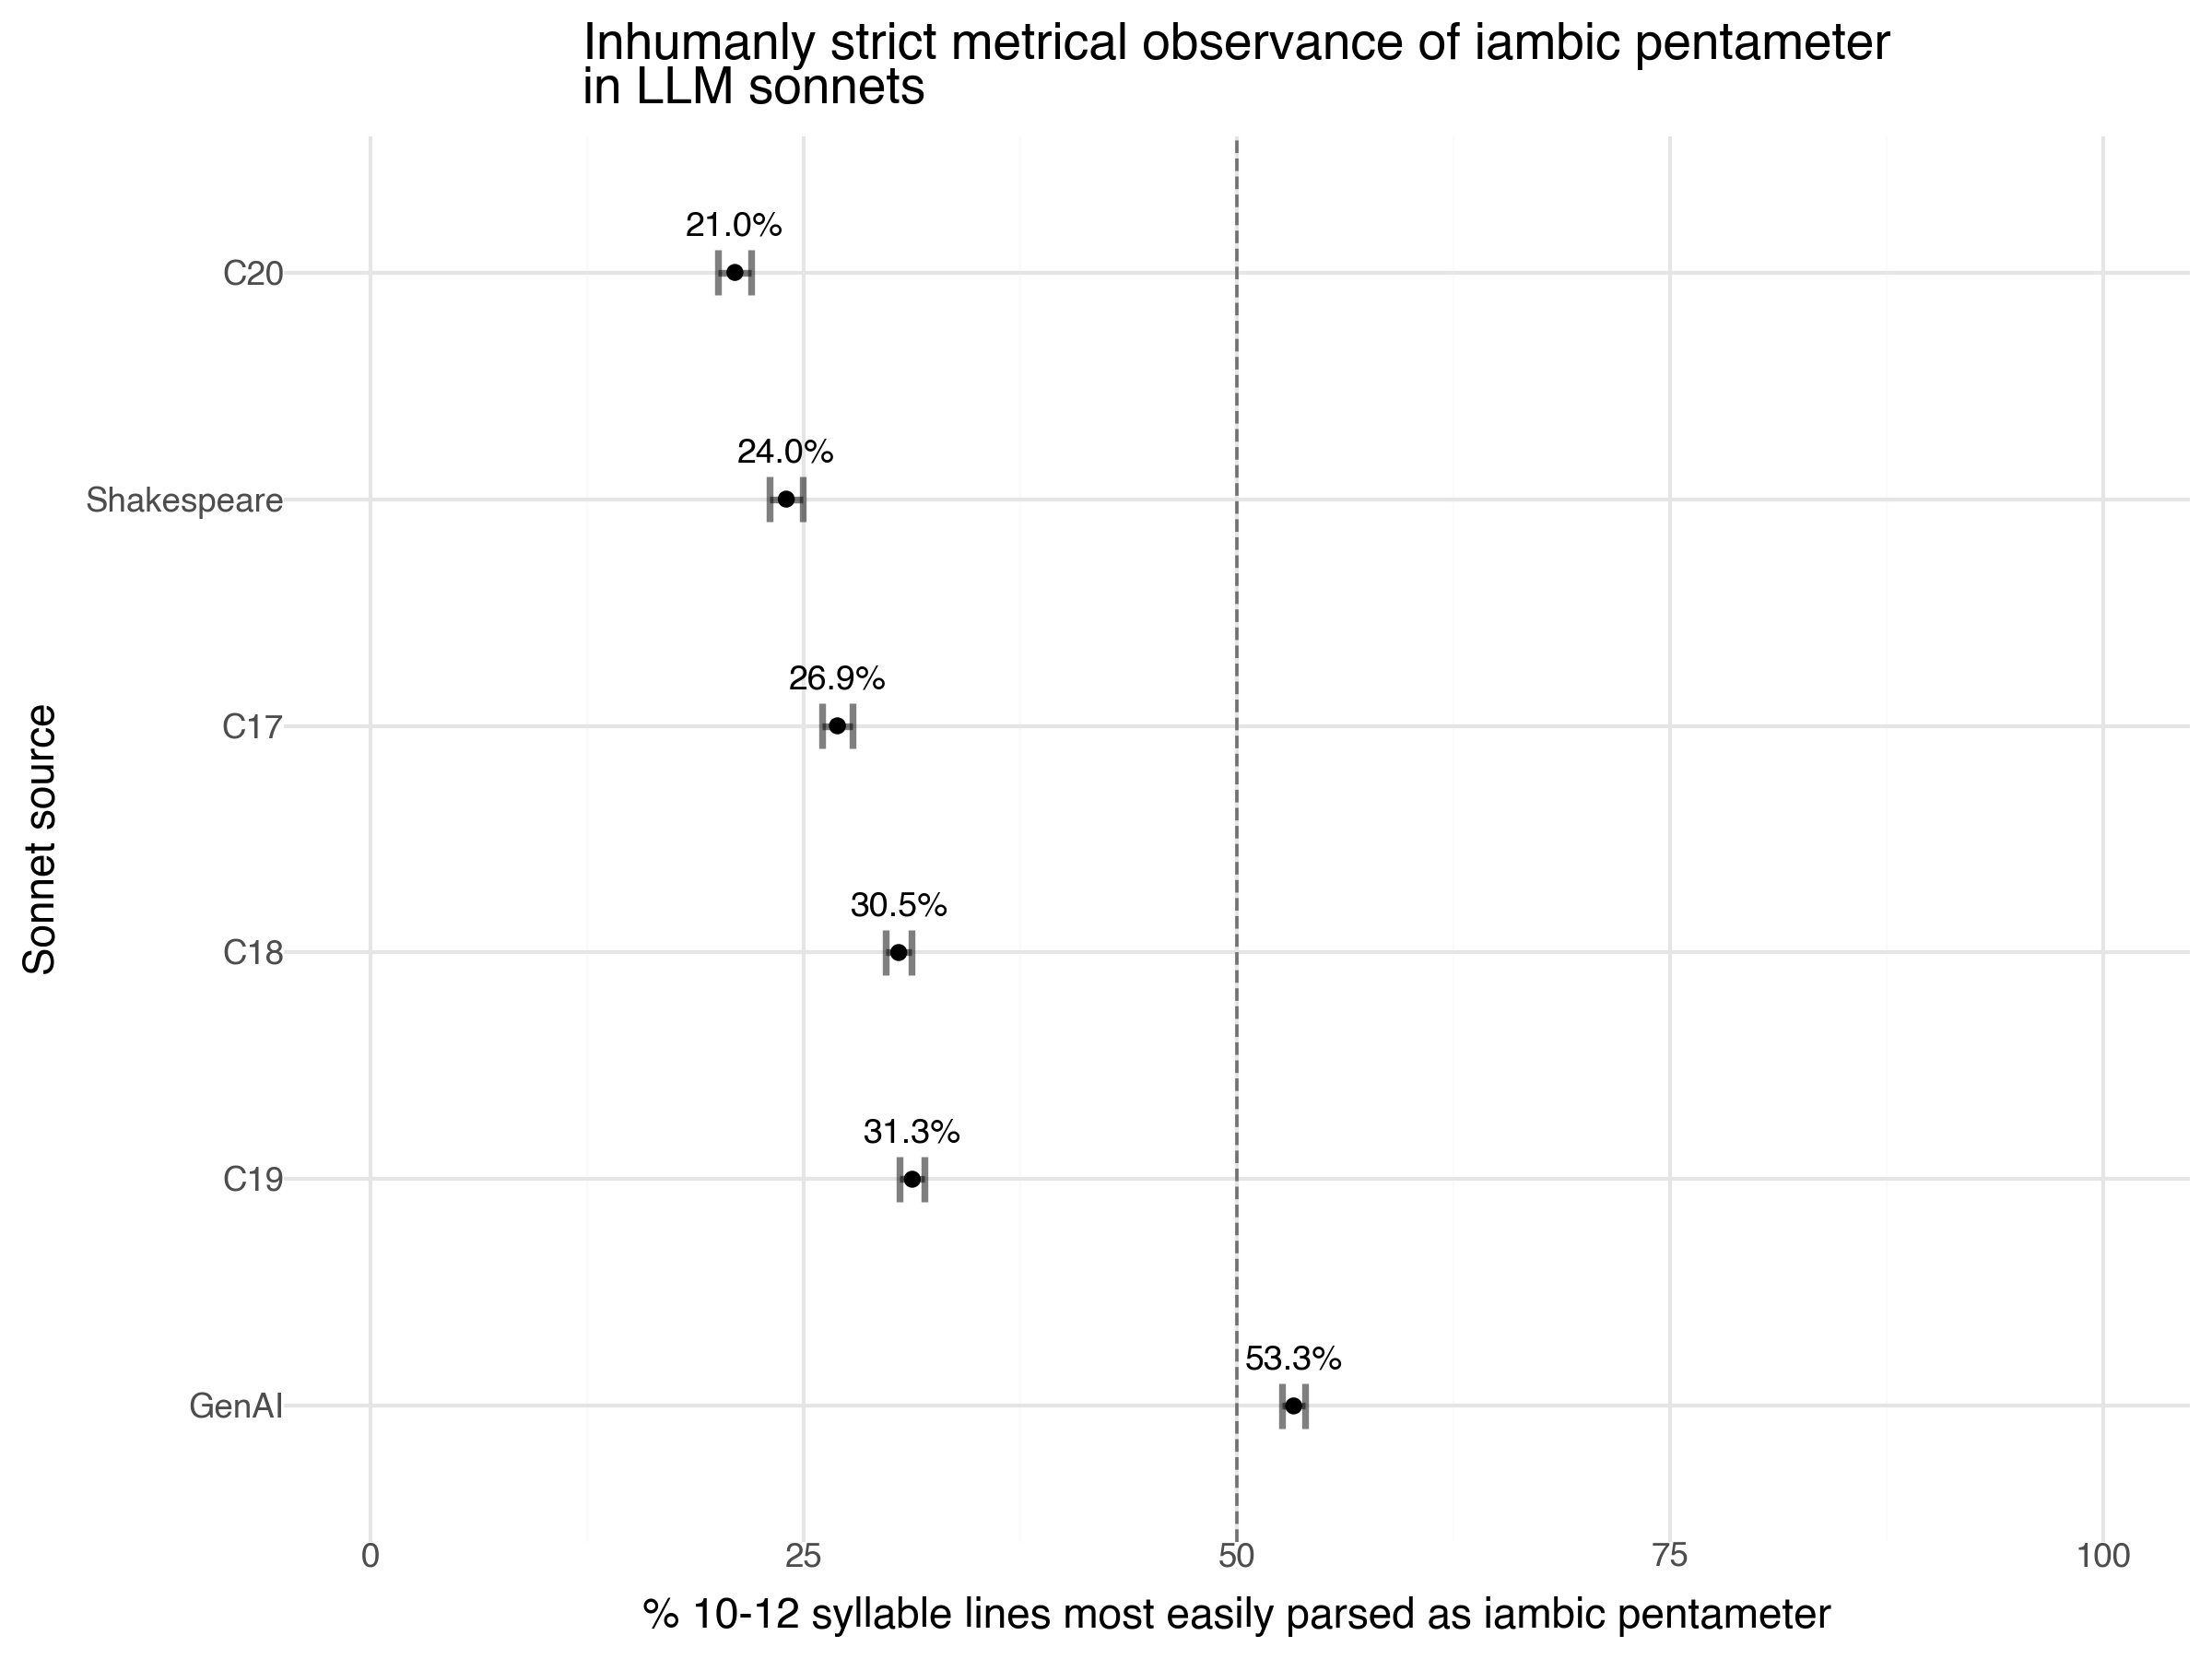

In [3]:
documentation(plot_perfect_pentameter)
plot_perfect_pentameter(df_rhythm)

In [4]:
df_stats = compute_stat_signif(
    df_rhythm,
    'group',
    'is_unambigously_iambic_pentameter'
)
df_stats

Computing comparisons for Shakespeare vs GenAI: 100%|██████████| 15/15 [00:09<00:00,  1.56it/s]


,comparison,n1,n2,p_value,effect_size,effect_size_str,mean1,mean2,significant,group
11,C20 vs GenAI,1831,5376,0.0000,0.675434,medium,0.210268,0.532738,True,GenAI
14,Shakespeare vs GenAI,1980,5376,0.0000,0.609197,medium,0.239899,0.532738,True,GenAI
13,C17 vs GenAI,2665,5376,0.0000,0.547018,medium,0.269418,0.532738,True,GenAI
4,C18 vs GenAI,4029,5376,0.0000,0.472120,small,0.304790,0.532738,True,GenAI
8,C19 vs GenAI,4069,5376,0.0000,0.454762,small,0.312608,0.532738,True,GenAI
5,C19 vs C20,4069,1831,0.0000,0.228954,small,0.312608,0.210268,True,C20
1,C18 vs C20,4029,1831,0.0000,0.212618,small,0.304790,0.210268,True,C20
7,C19 vs Shakespeare,4069,1980,0.0000,0.160861,,0.312608,0.239899,True,Shakespeare
3,C18 vs Shakespeare,4029,1980,0.0000,0.144301,,0.304790,0.239899,True,Shakespeare
9,C20 vs C17,1831,2665,0.0000,0.137754,,0.210268,0.269418,True,C17
